In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
# 그래프에 한글 사용 설정
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/NGULIM.ttf'  # 폰트가 설치되어 있는 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [20]:
import warnings
# 모든 경고 무시
warnings.filterwarnings('ignore')

In [22]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

## Matplotlib 라이브러리
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있으므로 별도의 라이브러리를 불러오지 않아도 간단한 그래프는 그릴 수 있음

### 1. Series, DataFrame 구조의 데이터 시각화 : plot( ) 메소드
- 판다스에서 제공하는 시각화 도구를 사용하려면 데이터 프레임(또는 시리즈) 객체에 plot( ) 메소드를 적용하여 그래프를 그리면 됨
- 그래프의 종류는 kind 옵션으로 선택할 수 있으며 kind 옵션을 생략하게 되면 가장 기본적인 선 그래프가 적용됨
   - kind 옵션
   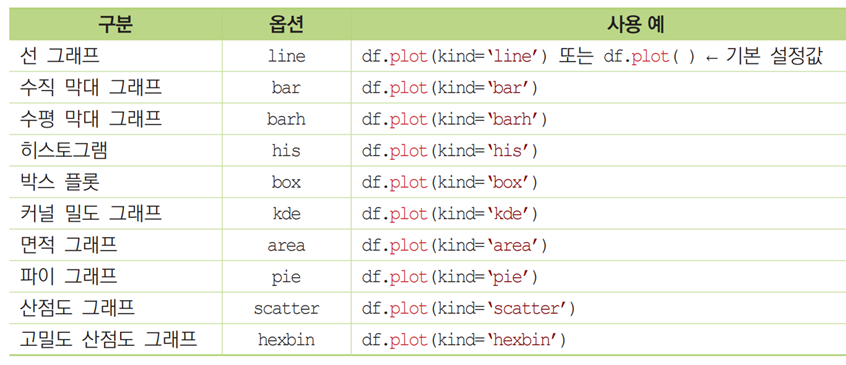

<Axes: >

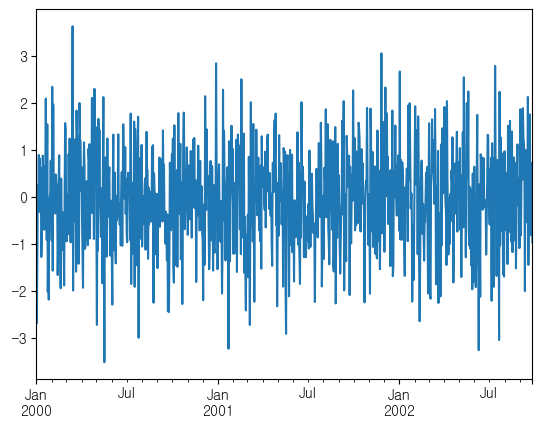

In [156]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

ts.plot()

<Axes: >

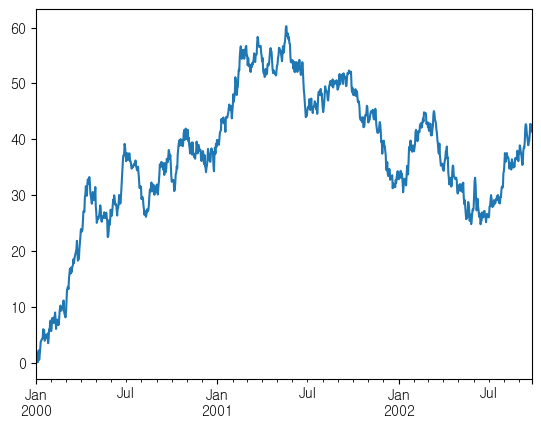

In [139]:
ts = ts.cumsum() # 시계열 데이터나 데이터프레임에서 누적 합을 계산할 때 사용
ts.plot()

In [141]:
ts

2000-01-01     0.873163
2000-01-02     0.785860
2000-01-03     0.525536
2000-01-04     1.620623
2000-01-05     0.072885
                ...    
2002-09-22    40.936929
2002-09-23    42.746074
2002-09-24    42.722244
2002-09-25    41.961245
2002-09-26    41.387680
Freq: D, Length: 1000, dtype: float64

In [267]:
# 생성된 배열은 1000x4의 형태로, 각각의 값은 평균이 0이고 표준편차가 1인 정규 분포에서 샘플링된 값
dd = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))
dd

,A,B,C,D
2000-01-01,0.514102,1.552274,1.472735,-1.251841
2000-01-02,-0.014493,1.719724,1.117140,0.617179
2000-01-03,-0.465519,0.131051,0.043132,-0.577830
2000-01-04,-0.266871,0.081609,0.626417,-1.159948
2000-01-05,0.302673,-0.294157,-0.428007,1.680297
...,...,...,...,...
2002-09-22,1.354153,0.376563,0.816608,0.197438
2002-09-23,0.194030,0.549493,-1.070722,0.671639
2002-09-24,0.405344,0.573500,1.668465,0.429978
2002-09-25,-1.528405,-1.732256,0.229856,0.429863


In [269]:
dd.iloc[3]

A   -0.266871
B    0.081609
C    0.626417
D   -1.159948
Name: 2000-01-04 00:00:00, dtype: float64

<Axes: title={'center': '기본 그래프'}>

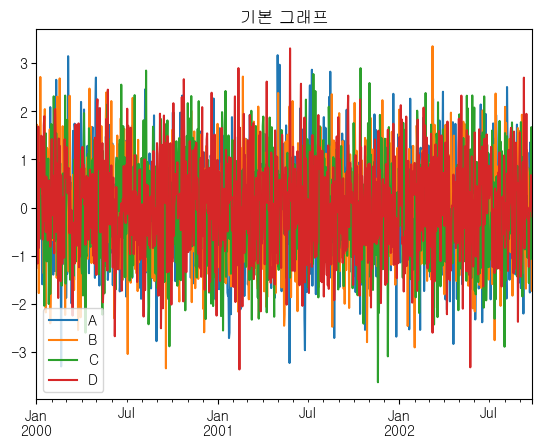

In [271]:
# dd.plot()
dd.plot(title ="기본 그래프")

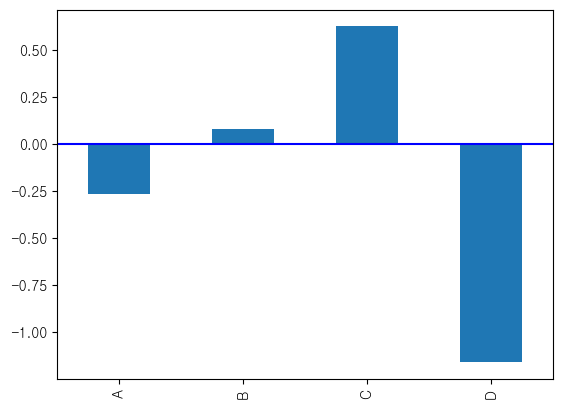

In [273]:
dd.iloc[3].plot(kind='bar')
plt.axhline(0, color='b')
# dd.iloc[3].plot.bar().axhline(0, color='b')

<Axes: >

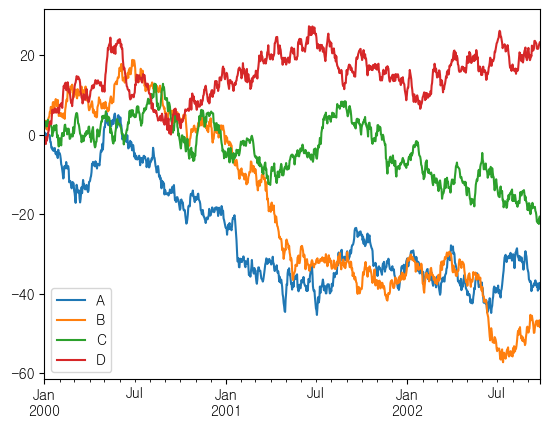

In [275]:
dd.cumsum().plot()

In [291]:
dd.iloc[3:7]

,A,B,C,D
2000-01-04,-0.266871,0.081609,0.626417,-1.159948
2000-01-05,0.302673,-0.294157,-0.428007,1.680297
2000-01-06,-0.718975,-1.776299,-0.777736,-0.840363
2000-01-07,0.348421,-0.189059,0.928008,0.597318


In [299]:
# stacked=True 값이 default
# dd.iloc[3:7].plot.area() # 컬럼의 값이 동일하여야 함(모두 양수, 음수여야 함) 다른 경우 오류

<Axes: >

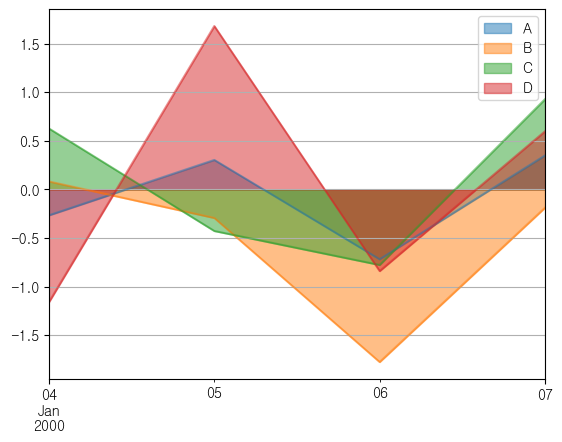

In [303]:
# stacked=False 값으로 지정하면 오류 해결됨
# dd.iloc[3:7].plot.area(stacked=False)
dd.iloc[3:7].plot.area(stacked=False, grid=True)

In [170]:
import pandas as pd
import numpy as np
data = {'국어':[100,88,88,99],
        '영어':[88,67,98,100],
        '수학':[89,99,100,78],
        '과학':[100,99,90,80],
        '사회':[67,78,89,99]}
df = pd.DataFrame(data, index=['이순신','김유신','홍길동','고길동'])
df

,국어,영어,수학,과학,사회
이순신,100,88,89,100,67
김유신,88,67,99,99,78
홍길동,88,98,100,90,89
고길동,99,100,78,80,99


<Axes: >

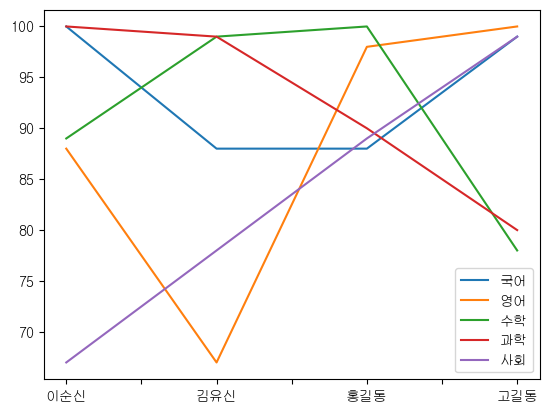

In [35]:
df.plot()

<Axes: >

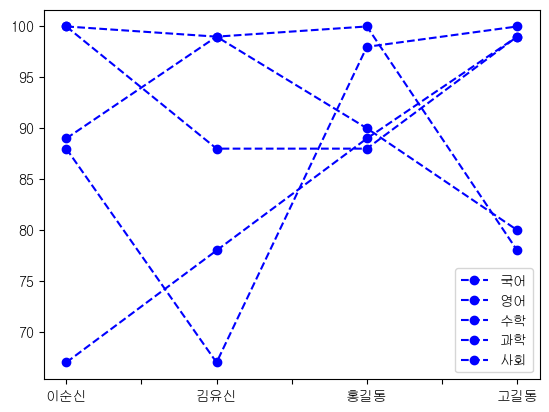

In [37]:
# Pandas(Series, DataFrame)로 작성하는 그래프의 색상, 마커, 선모양 등은 정확하게 명시하여 표현함
df.plot(c='b',marker='o', ls='--')

<Axes: >

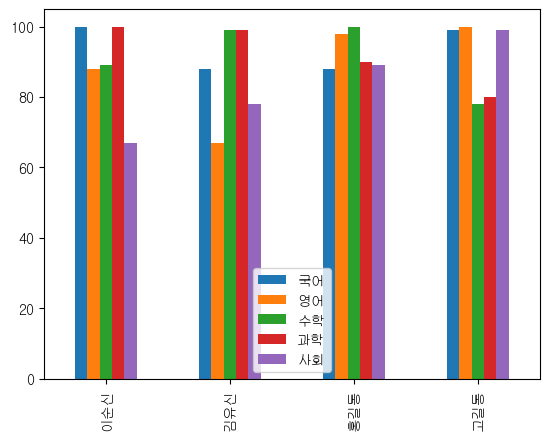

In [51]:
df.plot(kind='bar')
# df.plot.bar()

<Axes: >

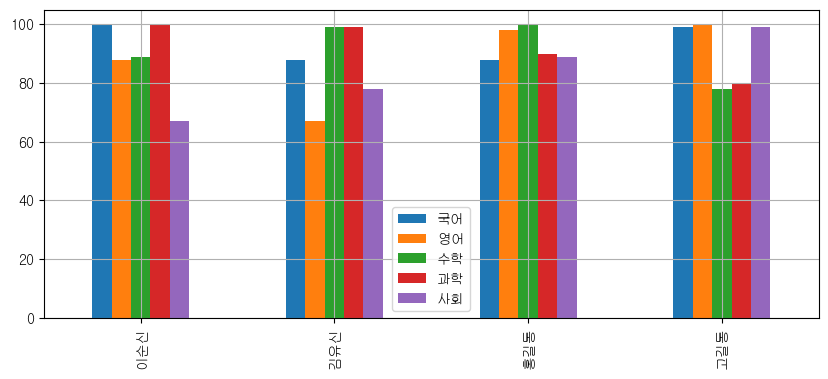

In [55]:
# Pandas(Series, DataFrame)에서 크기조절은 df.plot(figsize=())
df.plot(kind='bar', grid=True, figsize=(10,4))
# df.plot.bar(grid=True, figsize=(10,4))

<Axes: >

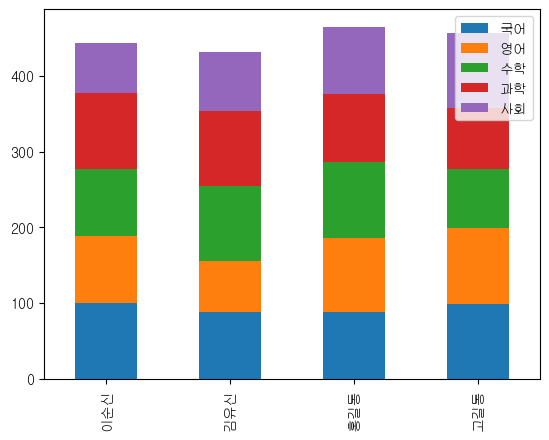

In [43]:
df.plot.bar(stacked=True)

<Axes: >

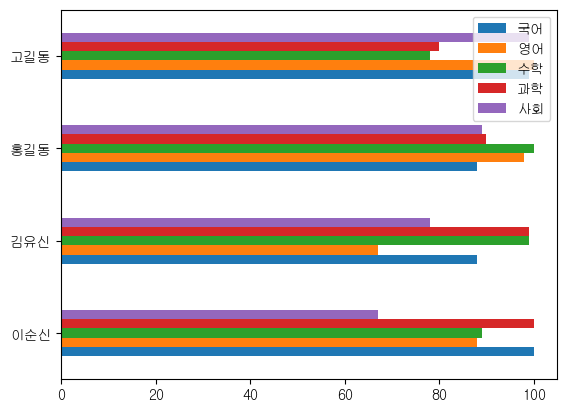

In [57]:
# df.plot(kind='barh')
df.plot.barh()

<Axes: >

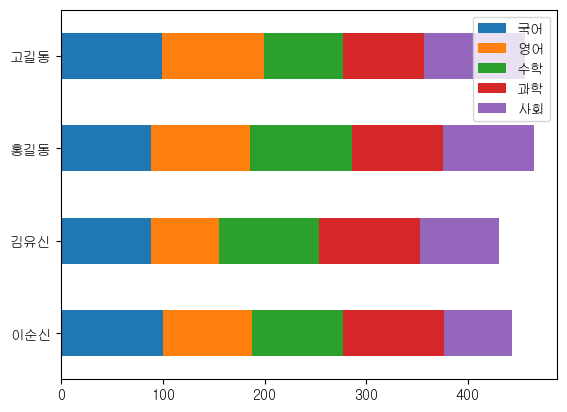

In [69]:
df.plot.barh(stacked=True)
# df.plot(kind='barh', stacked=True)

<Axes: >

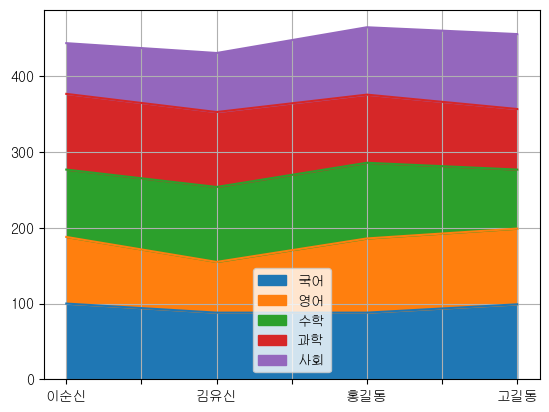

In [263]:
df.plot.area(grid=True)

<Axes: >

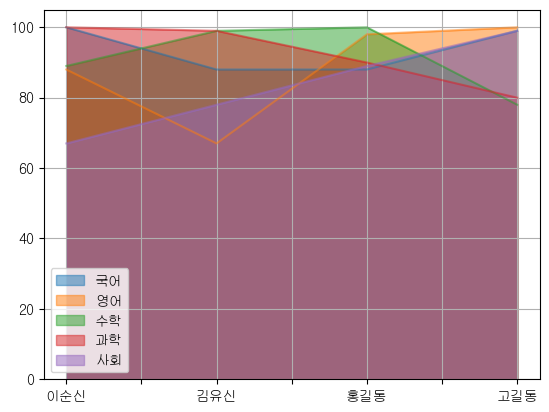

In [305]:
df.plot.area(stacked=False, grid=True)

<Axes: >

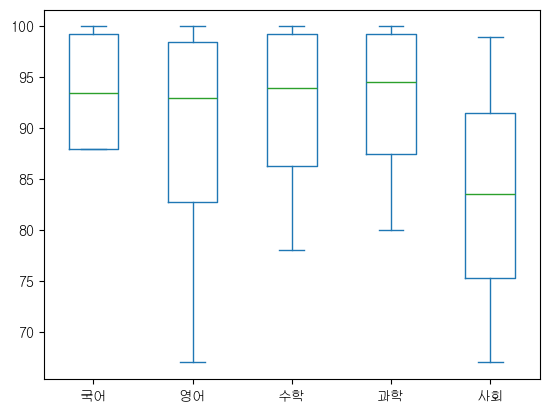

In [61]:
df.plot(kind='box')
# df.plot.box()

<Axes: ylabel='고길동'>

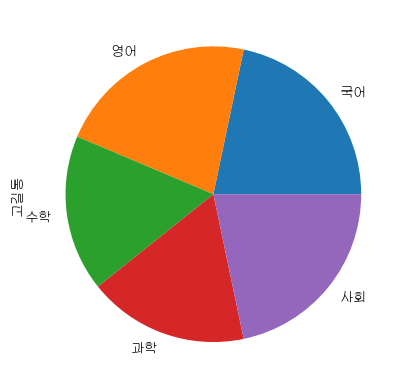

In [184]:
# df.iloc[3].plot(kind='pie')
df.iloc[3].plot.pie()

<Axes: ylabel='Density'>

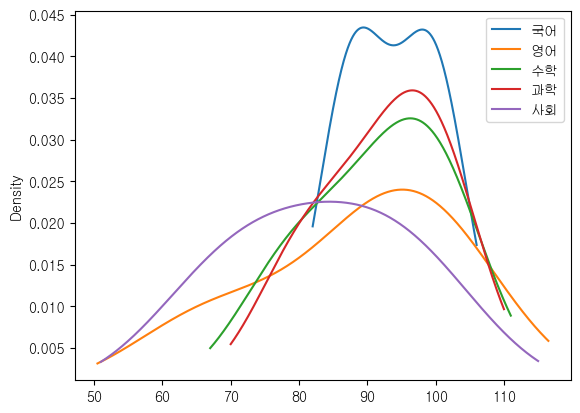

In [65]:
df.plot(kind='kde')
# df.plot.kde()

### 2. Matplotlib 시각화 : pyplot 서브 패키지 
- Matplotlib 패키지의 서브패키지
- 매트랩(matlab) 이라는 수치해석 소프트웨어의 시각화 명령을 거의 그대로 사용
- 간단한 시각화 프로그램을  만드는 경우에는 pyplot 서브패키지의 명령만으로도 충분
- import matplotlib.pyplot as plt
    - plt 라는 다른 별칭으로 import 

- 참고문헌
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py 
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
- https://wikidocs.net/124976

In [154]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

- 그래프 스타일 지정
- https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

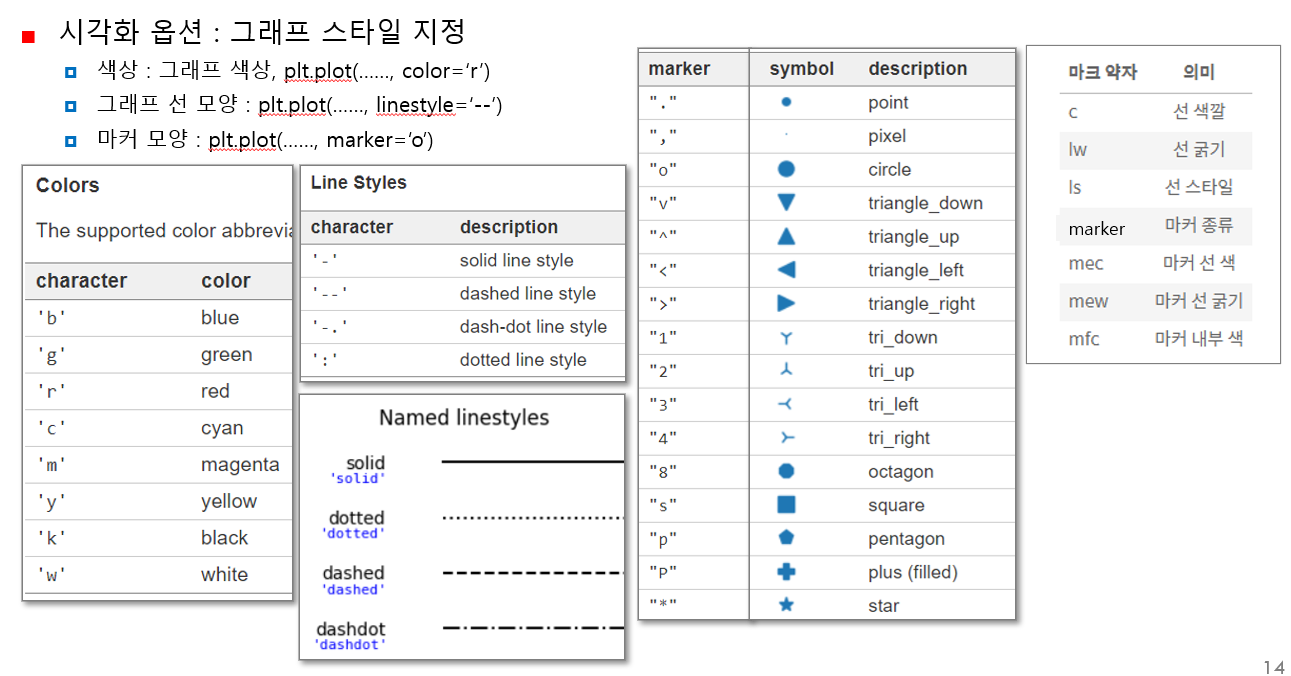

- 색상 추가 : plt.plot(.... color='red') # color 속성 사용
- 그래프 선 모양 : plt.plot(.... linestyle='--', label = 'dashed') # linestyle 속성 사용
- x축 범위 지정 : plt.xlim(0, 50) # 0 ~50 범위
- y축 범위 지정 : plt.ylim(0, 30) # 0 ~30 범위

In [156]:
data = {'국어':[100,88,88,99],
        '영어':[88,67,98,100],
        '수학':[89,99,100,78],
        '과학':[100,99,90,80],
        '사회':[67,78,89,99]}
df = pd.DataFrame(data, index=['이순신','김유신','홍길동','고길동'])
df

,국어,영어,수학,과학,사회
이순신,100,88,89,100,67
김유신,88,67,99,99,78
홍길동,88,98,100,90,89
고길동,99,100,78,80,99


In [157]:
np.arange(len(df.index)) 

array([0, 1, 2, 3])

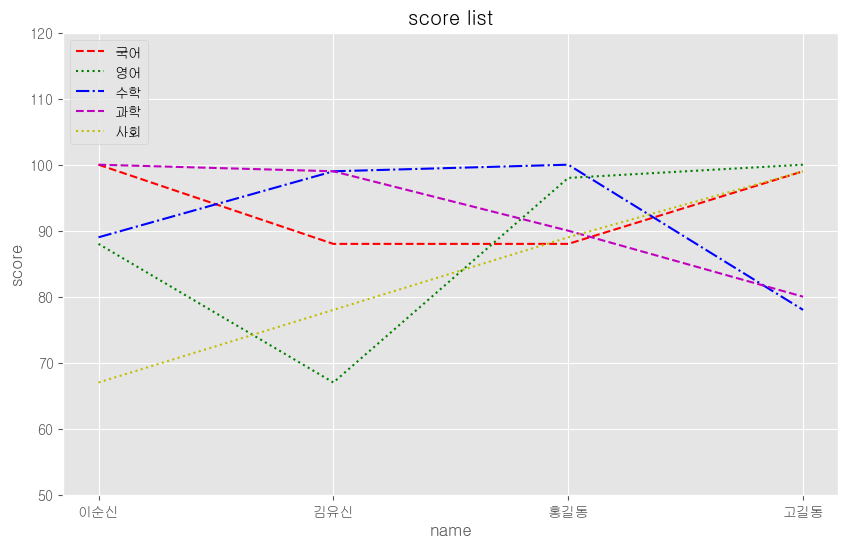

In [158]:
# 그래프 크기 조정
plt.figure(figsize=(10, 6))  # (너비, 높이) 설정
# 제목을 설정한다. 
plt.title("score list") 

x = df.index
plt.plot(x, df.국어, color='r', ls="--", label="국어")
plt.plot(x, df.영어, color='g', ls=":", label="영어")
plt.plot(x, df.수학, color='b', ls="-.", label="수학") 
plt.plot(x, df.과학, color='m', ls="--", label="과학")
plt.plot(x, df.사회, color='y', ls=":", label="사회") 

# x, y축에 레이블을 붙인다. 
plt.xlabel("name") 
plt.ylabel("score") 
plt.ylim(50, 120)
plt.legend(loc=2)
# plt.savefig("sales.png", dpi=600)  # png 이미지로 저장 가능
plt.show() 


In [159]:
df1 = df.T
df1

,이순신,김유신,홍길동,고길동
국어,100,88,88,99
영어,88,67,98,100
수학,89,99,100,78
과학,100,99,90,80
사회,67,78,89,99


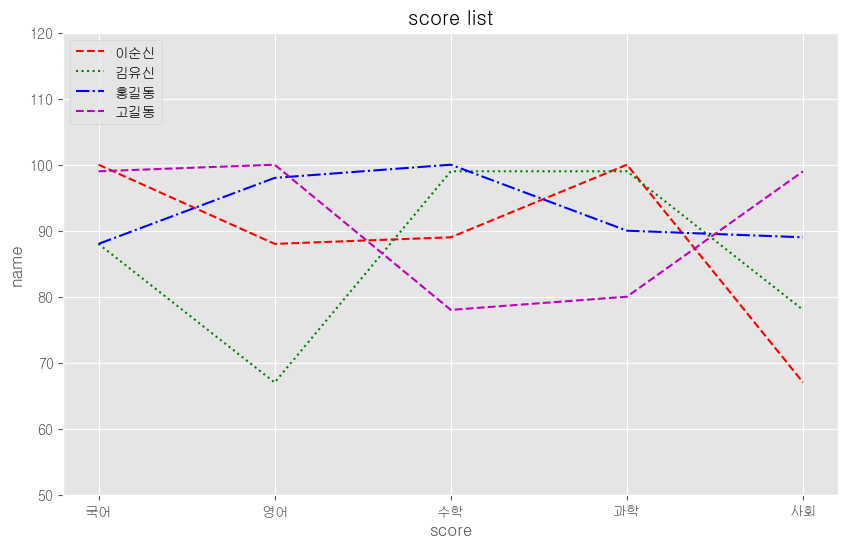

In [160]:
# 그래프 크기 조정
plt.figure(figsize=(10, 6))  # (너비, 높이) 설정
# 제목을 설정한다. 
plt.title("score list") 

x = df1.index
plt.plot(x, df1.이순신, color='r', ls="--", label="이순신")
plt.plot(x, df1.김유신, color='g', ls=":", label="김유신")
plt.plot(x, df1.홍길동, color='b', ls="-.", label="홍길동") 
plt.plot(x, df1.고길동, color='m', ls="--", label="고길동")

# x, y축에 레이블을 붙인다. 
plt.xlabel("score") 
plt.ylabel("name") 
plt.ylim(50, 120)
plt.legend(loc=2)
# plt.savefig("sales.png", dpi=600)  # png 이미지로 저장 가능
plt.show() 


### 다양한 스타일 사용 : plt.style.use()
- default, bmh, ggplot, classic, dark_background, grayscale 가능
- plt.style.use('ggplot')

#### 막대(bar) 그래프

c:\Users\Noh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Noh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Noh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Noh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Noh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

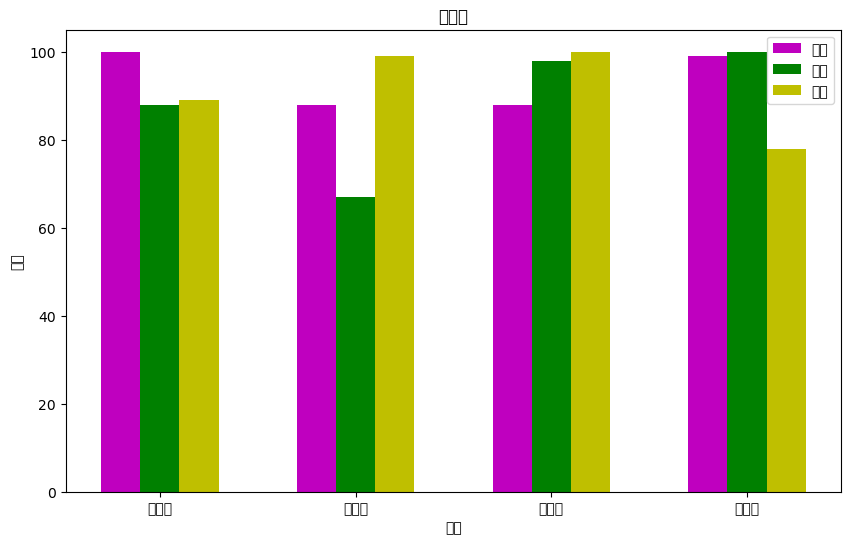

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터프레임 생성
data = {
    'kor': [100, 88, 88, 99],
    'eng': [88, 67, 98, 100],
    'mat': [89, 99, 100, 78]
}        
df = pd.DataFrame(data, index=['이순신', '김유신', '홍길동', '고길동'])

# 그래프 크기 조정
plt.figure(figsize=(10, 6))  # (너비, 높이) 설정

# 각 열에 해당하는 값을 height로 사용하여 막대 그래프 그리기
width = 0.2  # 막대의 너비
x = np.arange(len(df.index))  # x축 위치 설정 x[0] = 0 (이순신의 위치)...x[3] = 3 (고길동의 위치)

# 막대 그래프 그리기
plt.bar(x - width, df.kor, width, label="국어", color='m')
plt.bar(x, df.eng, width, label="영어", color='g')
plt.bar(x + width, df.mat, width, label="수학", color='y')

# 제목 및 레이블 설정
plt.title("성적표")
plt.xlabel("이름")
plt.ylabel("점수")
plt.xticks(x, df.index)  # x축의 눈금을 학생 이름으로 설정
plt.legend(loc='upper right')

# 그래프 보여주기
plt.show()

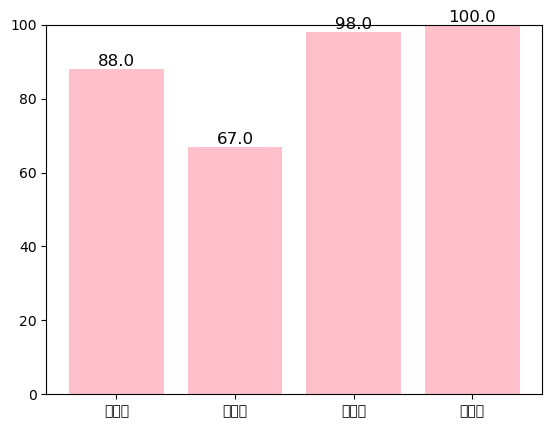

In [15]:
import matplotlib.pyplot as plt

x = ['이순신', '김유신', '홍길동', '고길동']
y = [88, 67, 98, 100]
bar = plt.bar(x, y, color = 'pink') 
plt.ylim(0, 100)

# 숫자 넣는 부분
for rect in bar:    
    height = rect.get_height() # bar(막대)의 y 값을 height에 저장  
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
plt.show()

#### 누적 막대 그래프

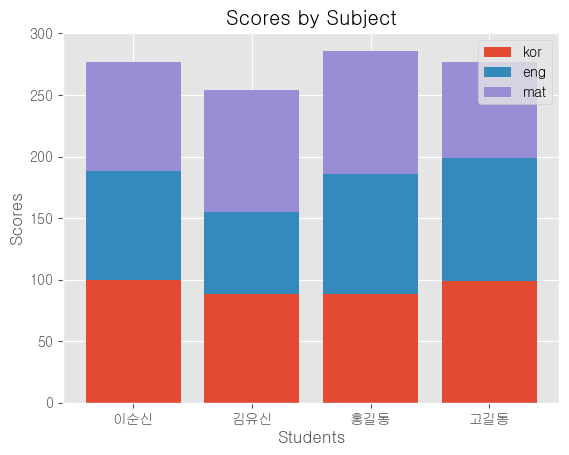

In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {'kor': [100, 88, 88, 99],
        'eng': [88, 67, 98, 100],
        'mat': [89, 99, 100, 78]}
df = pd.DataFrame(data, index=['이순신', '김유신', '홍길동', '고길동'])

# 각 열에 해당하는 값을 height로 사용하여 막대 그래프 그리기
plt.bar(df.index, df['kor'], label='kor')
plt.bar(df.index, df['eng'], bottom=df['kor'], label='eng')
plt.bar(df.index, df['mat'], bottom=df['kor'] + df['eng'], label='mat')

plt.xlabel('Students')
plt.ylabel('Scores')
plt.title('Scores by Subject')
plt.legend()
plt.show()

C:\Users\Noh\AppData\Local\Temp\ipykernel_28564\4269290035.py:28: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_28564\4269290035.py:28: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_28564\4269290035.py:28: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_28564\4269290035.py:28: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_28564\4269290035.py:28: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_28564\4269290035.py:28: UserWarning: Glyph 

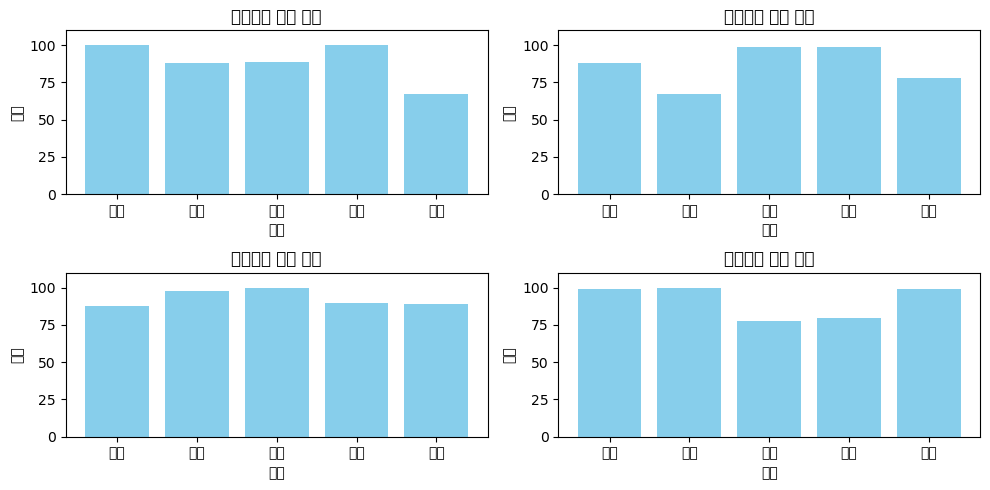

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = {
    '국어': [100, 88, 88, 99],
    '영어': [88, 67, 98, 100],
    '수학': [89, 99, 100, 78],
    '과학': [100, 99, 90, 80],
    '사회': [67, 78, 89, 99]
}
df = pd.DataFrame(data, index=['이순신', '김유신', '홍길동', '고길동'])

# 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 2x2 그리드 설정
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 각 학생에 대해 막대 그래프 그리기
for i, student in enumerate(df.index):
    scores = df.loc[student]  # 특정 학생의 점수
    axes[i].bar(scores.index, scores.values, color='skyblue')
    axes[i].set_title(f'{student}의 성적 분포')
    axes[i].set_ylim(0, 110)  # Y축 범위 설정
    axes[i].set_xlabel('과목')
    axes[i].set_ylabel('점수')

plt.tight_layout()  # 레이아웃 조정
plt.show()

#### 파이(pie) 그래프

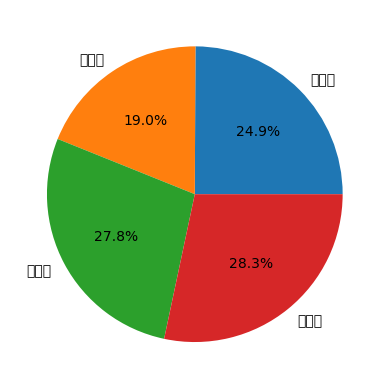

In [7]:
# autopct로 실수 표시
name = ['이순신', '김유신', '홍길동', '고길동']
score = [88, 67, 98, 100]
plt.pie(score, labels = name, autopct='%.1f%%') 
plt.show() 

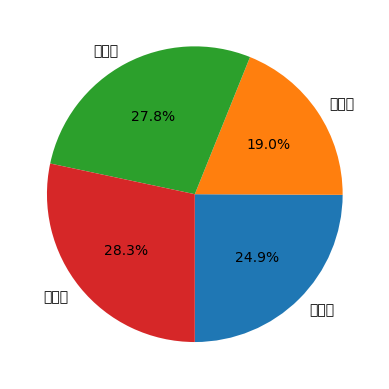

In [11]:
# 시작 각도와 방향 설정하기
name = ['이순신', '김유신', '홍길동', '고길동']
score = [88, 67, 98, 100]
plt.pie(score, labels = name, autopct='%.1f%%', startangle=270, counterclock=True) # 반시계 방향 
plt.show() 

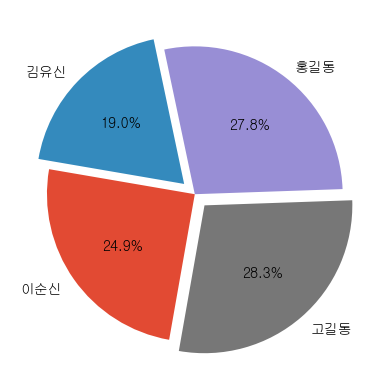

In [199]:
# 중심에서 벗어나는 정도 설정하기
explode = [0, 0.10, 0, 0.10]
name = ['이순신', '김유신', '홍길동', '고길동']
score = [88, 67, 98, 100]
plt. pie(score, labels = name, autopct='%.1f%%',
        startangle=260, counterclock=False, explode=explode)
plt.show()

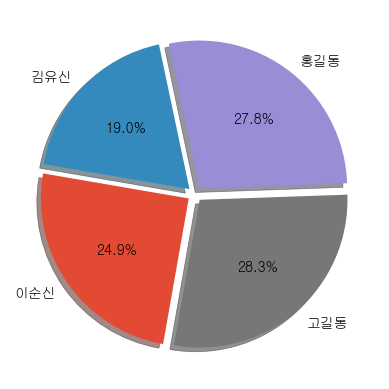

In [201]:
# 그림자 나타내기
explode = [0.05, 0.05, 0.05, 0.05]
name = ['이순신', '김유신', '홍길동', '고길동']
score = [88, 67, 98, 100]
plt. pie(score, labels = name, autopct='%.1f%%',startangle=260,
        counterclock=False, explode=explode, shadow=True)
plt.show()

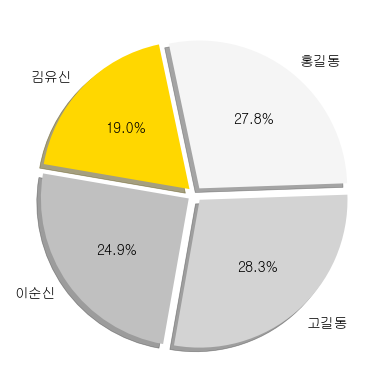

In [205]:
# 색상 지정하기
explode = [0.05, 0.05, 0.05, 0.05]
name = ['이순신', '김유신', '홍길동', '고길동']
score = [88, 67, 98, 100]
colors = ['silver', 'gold', 'whitesmoke', 'lightgray'] #colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt. pie(score, labels = name, autopct='%.1f%%',startangle=260,
         counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

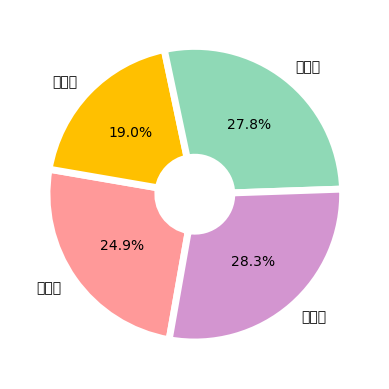

In [15]:
# 부채꼴 스타일 지정하기
name = ['이순신', '김유신', '홍길동', '고길동']
score = [88, 67, 98, 100]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width':0.75, 'edgecolor':'w', 'linewidth':5}
plt. pie(score, labels = name, autopct='%.1f%%',startangle=260,
         counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

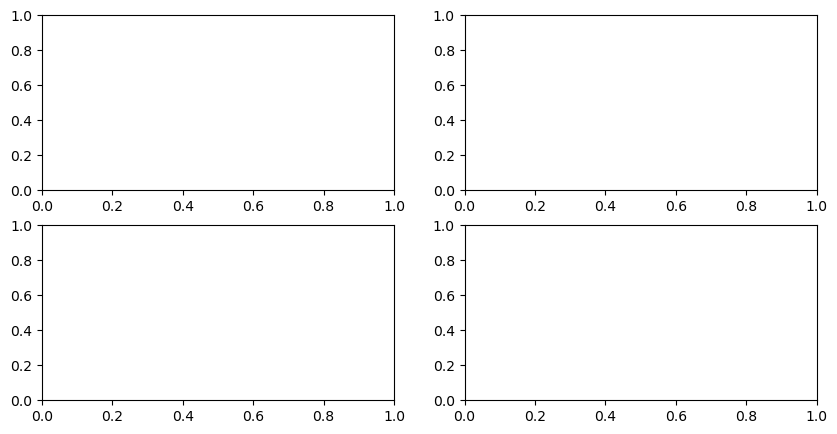

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = {
    '국어': [100, 88, 88, 99],
    '영어': [88, 67, 98, 100],
    '수학': [89, 99, 100, 78],
    '과학': [100, 99, 90, 80],
    '사회': [67, 78, 89, 99]
}
df = pd.DataFrame(data, index=['이순신', '김유신', '홍길동', '고길동'])

# 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 2x2 그리드 설정
axes = axes.flatten()  # 2D 배열을 1D로 변환

In [3]:
df

,국어,영어,수학,과학,사회
이순신,100,88,89,100,67
김유신,88,67,99,99,78
홍길동,88,98,100,90,89
고길동,99,100,78,80,99


C:\Users\Noh\AppData\Local\Temp\ipykernel_13760\2020003043.py:26: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_13760\2020003043.py:26: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_13760\2020003043.py:26: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_13760\2020003043.py:26: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_13760\2020003043.py:26: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # 레이아웃 조정
C:\Users\Noh\AppData\Local\Temp\ipykernel_13760\2020003043.py:26: UserWarning: Glyph 5

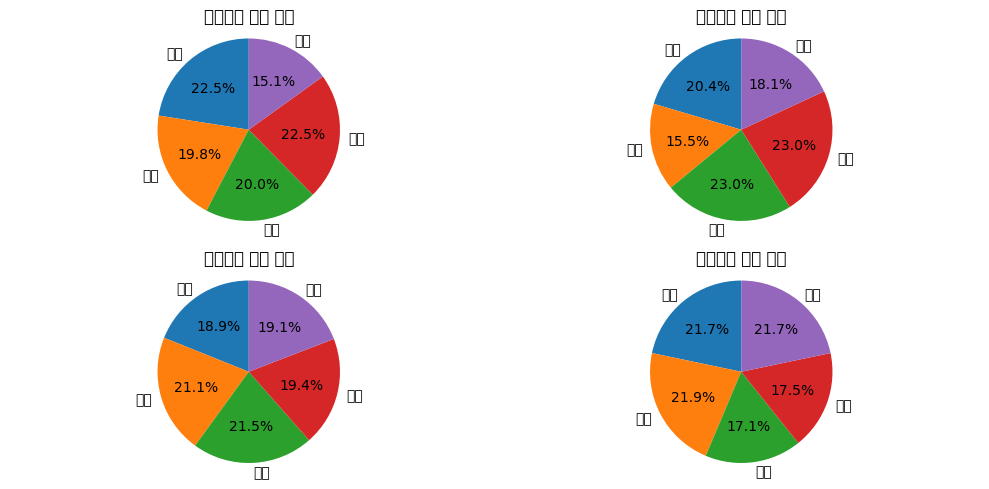

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = {
    '국어': [100, 88, 88, 99],
    '영어': [88, 67, 98, 100],
    '수학': [89, 99, 100, 78],
    '과학': [100, 99, 90, 80],
    '사회': [67, 78, 89, 99]
}
df = pd.DataFrame(data, index=['이순신', '김유신', '홍길동', '고길동'])

# 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 2x2 그리드 설정
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 각 학생에 대해 파이 차트 그리기
for i, student in enumerate(df.index):
    scores = df.loc[student]  # 특정 학생의 점수
    axes[i].pie(scores, labels=scores.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{student}의 성적 분포')
    axes[i].axis('equal')  # 원형 유지

plt.tight_layout()  # 레이아웃 조정
plt.show()

#### pd.read_html(url) : url 주소의 웹페이지의 table를 가져올 수 있다
- wikipedia 에서 테이블 정보를 가져 옴

In [15]:
import pandas as pd
url = "https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC" #대한민국 인구
wiki_tables = pd.read_html(url)   
wiki = wiki_tables[0]
wiki

Unnamed: 0_level_0    2016           2017          2018          2019  \
   Unnamed: 0_level_1      인구   인구밀도      인구   인구밀도     인구   인구밀도     인구   
0                   계   51218    510   51362    512  51607    514  51709   
1                  서울    9843  16263    9766  16136   9705  16034   9662   
2                  부산  약3,500   4477  약3,100   4447   3400   4416   3300   
3                  대구    2461   2786    2458   2782   2450   2773   2432   
4                  인천    2907   2736    2924   2750   2939   2764   2944   
5                  광주    1502   2997    1495   2984   1493   2980   1494   
6                  대전    1536   2848    1528   2832   1518   2813   1509   
7                  울산    1166   1099    1159   1092   1154   1088   1147   
8                  세종     234    504     266    571    304    653    331   
9                  경기   12600   1237   12786   1255  13031   1279  13238   
10                 강원    1521     90    1521     90   1521     90   1517   
11                 충북    1601    216    1609    217   1619    219   1626   
12                 충남    2126    258    2153    262   2180    265   2188   
13                 전북    1835    227    1829    227   1820    226   1803   
14                 전남    1798    146    1795    146   1790    145   1773   
15                 경북    2683    141    2675    141   2674    141   2665   
16                 경남    3338    317    3339    317   3356    318   3350   
17                 제주     618    334     635    343    653    353    660   
18                수도권   25350   2139   25476   2149  25675   2165  25844   

            2020         
     인구밀도     인구   인구밀도  
0     515  51781    516  
1   15964   9602  15865  
2    4380   3344   4342  
3    2753   2419   2738  
4    2769   2951   2770  
5    2980   1488   2969  
6    2796   1500   2780  
7    1080   1140   1073  
8     712    349    750  
9    1299  13405   1315  
10     90   1515     90  
11    219   1632    220  
12    265   2204    267  
13    223   1792    222  
14    144   1764    143  
15    140   2655    140  
16    318   3350    318  
17    356    670    362  
18   2179  25958   2188

In [16]:
# 레벨 1 부분을 제거합니다.
wiki.columns = wiki.columns.droplevel(1)
wiki

,Unnamed: 0_level_0,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020
0,계,51218,510,51362,512,51607,514,51709,515,51781,516
1,서울,9843,16263,9766,16136,9705,16034,9662,15964,9602,15865
2,부산,"약3,500",4477,"약3,100",4447,3400,4416,3300,4380,3344,4342
3,대구,2461,2786,2458,2782,2450,2773,2432,2753,2419,2738
4,인천,2907,2736,2924,2750,2939,2764,2944,2769,2951,2770
5,광주,1502,2997,1495,2984,1493,2980,1494,2980,1488,2969
6,대전,1536,2848,1528,2832,1518,2813,1509,2796,1500,2780
7,울산,1166,1099,1159,1092,1154,1088,1147,1080,1140,1073
8,세종,234,504,266,571,304,653,331,712,349,750
9,경기,12600,1237,12786,1255,13031,1279,13238,1299,13405,1315


In [18]:
# 컬럼명을 '지역'으로 변경
wiki.columns = wiki.columns.str.replace('Unnamed: 0_level_0', '지역')
wiki

,지역,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020
0,계,51218,510,51362,512,51607,514,51709,515,51781,516
1,서울,9843,16263,9766,16136,9705,16034,9662,15964,9602,15865
2,부산,"약3,500",4477,"약3,100",4447,3400,4416,3300,4380,3344,4342
3,대구,2461,2786,2458,2782,2450,2773,2432,2753,2419,2738
4,인천,2907,2736,2924,2750,2939,2764,2944,2769,2951,2770
5,광주,1502,2997,1495,2984,1493,2980,1494,2980,1488,2969
6,대전,1536,2848,1528,2832,1518,2813,1509,2796,1500,2780
7,울산,1166,1099,1159,1092,1154,1088,1147,1080,1140,1073
8,세종,234,504,266,571,304,653,331,712,349,750
9,경기,12600,1237,12786,1255,13031,1279,13238,1299,13405,1315


In [19]:
# .csv 파일로 저장하기 : 인덱스 무시
wiki.to_csv('wiki_ingu.csv', index = False)

In [20]:
# .csv 파일 읽기
wiki_ingu = pd.read_csv('wiki_ingu.csv')
wiki_ingu

,지역,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1
0,계,51218,510,51362,512,51607,514,51709,515,51781,516
1,서울,9843,16263,9766,16136,9705,16034,9662,15964,9602,15865
2,부산,"약3,500",4477,"약3,100",4447,3400,4416,3300,4380,3344,4342
3,대구,2461,2786,2458,2782,2450,2773,2432,2753,2419,2738
4,인천,2907,2736,2924,2750,2939,2764,2944,2769,2951,2770
5,광주,1502,2997,1495,2984,1493,2980,1494,2980,1488,2969
6,대전,1536,2848,1528,2832,1518,2813,1509,2796,1500,2780
7,울산,1166,1099,1159,1092,1154,1088,1147,1080,1140,1073
8,세종,234,504,266,571,304,653,331,712,349,750
9,경기,12600,1237,12786,1255,13031,1279,13238,1299,13405,1315


In [21]:
wiki_ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      19 non-null     object
 1   2016    19 non-null     object
 2   2016.1  19 non-null     int64 
 3   2017    19 non-null     object
 4   2017.1  19 non-null     int64 
 5   2018    19 non-null     int64 
 6   2018.1  19 non-null     int64 
 7   2019    19 non-null     int64 
 8   2019.1  19 non-null     int64 
 9   2020    19 non-null     int64 
 10  2020.1  19 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1.8+ KB


In [22]:
wiki_ingu['2016'] = wiki_ingu['2016'].replace({'약3,500': 3500}).astype('int64')
wiki_ingu['2017'] = wiki_ingu['2017'].replace({'약3,100': 3100}).astype('int64')

In [23]:
wiki_ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      19 non-null     object
 1   2016    19 non-null     int64 
 2   2016.1  19 non-null     int64 
 3   2017    19 non-null     int64 
 4   2017.1  19 non-null     int64 
 5   2018    19 non-null     int64 
 6   2018.1  19 non-null     int64 
 7   2019    19 non-null     int64 
 8   2019.1  19 non-null     int64 
 9   2020    19 non-null     int64 
 10  2020.1  19 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ KB


In [24]:
# '지역'을 인덱스로 지정
ingu_r = wiki_ingu.set_index('지역')
ingu_r

,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1
지역,,,,,,,,,,
계,51218,510,51362,512,51607,514,51709,515,51781,516
서울,9843,16263,9766,16136,9705,16034,9662,15964,9602,15865
부산,3500,4477,3100,4447,3400,4416,3300,4380,3344,4342
대구,2461,2786,2458,2782,2450,2773,2432,2753,2419,2738
인천,2907,2736,2924,2750,2939,2764,2944,2769,2951,2770
광주,1502,2997,1495,2984,1493,2980,1494,2980,1488,2969
대전,1536,2848,1528,2832,1518,2813,1509,2796,1500,2780
울산,1166,1099,1159,1092,1154,1088,1147,1080,1140,1073
세종,234,504,266,571,304,653,331,712,349,750


In [25]:
# 인구만 추출
ingu_r = ingu_r.iloc[:,0::2] 
ingu_r

,2016,2017,2018,2019,2020
지역,,,,,
계,51218,51362,51607,51709,51781
서울,9843,9766,9705,9662,9602
부산,3500,3100,3400,3300,3344
대구,2461,2458,2450,2432,2419
인천,2907,2924,2939,2944,2951
광주,1502,1495,1493,1494,1488
대전,1536,1528,1518,1509,1500
울산,1166,1159,1154,1147,1140
세종,234,266,304,331,349


In [26]:
# 인덱스 해제
ingu_r =  ingu_r.reset_index()
ingu_r

,지역,2016,2017,2018,2019,2020
0,계,51218,51362,51607,51709,51781
1,서울,9843,9766,9705,9662,9602
2,부산,3500,3100,3400,3300,3344
3,대구,2461,2458,2450,2432,2419
4,인천,2907,2924,2939,2944,2951
5,광주,1502,1495,1493,1494,1488
6,대전,1536,1528,1518,1509,1500
7,울산,1166,1159,1154,1147,1140
8,세종,234,266,304,331,349
9,경기,12600,12786,13031,13238,13405


In [27]:
# 완성된 데이터프레임 저장
# .csv 파일로 저장하기 : 인덱스 무시
ingu_r.to_csv('ingu.csv', index = False)

In [28]:
# .csv 파일 읽기
ingu = pd.read_csv('ingu.csv')
ingu

,지역,2016,2017,2018,2019,2020
0,계,51218,51362,51607,51709,51781
1,서울,9843,9766,9705,9662,9602
2,부산,3500,3100,3400,3300,3344
3,대구,2461,2458,2450,2432,2419
4,인천,2907,2924,2939,2944,2951
5,광주,1502,1495,1493,1494,1488
6,대전,1536,1528,1518,1509,1500
7,울산,1166,1159,1154,1147,1140
8,세종,234,266,304,331,349
9,경기,12600,12786,13031,13238,13405


In [29]:
ingu_c = ingu.copy()

In [30]:
# '지역'을 인덱스로 지정
ingu.set_index('지역', inplace=True)
# '계' 행 삭제
ingu = ingu.drop('계')
ingu

,2016,2017,2018,2019,2020
지역,,,,,
서울,9843,9766,9705,9662,9602
부산,3500,3100,3400,3300,3344
대구,2461,2458,2450,2432,2419
인천,2907,2924,2939,2944,2951
광주,1502,1495,1493,1494,1488
대전,1536,1528,1518,1509,1500
울산,1166,1159,1154,1147,1140
세종,234,266,304,331,349
경기,12600,12786,13031,13238,13405


In [31]:
# '수도권' 행 삭제
ingu = ingu.drop('수도권')
ingu

,2016,2017,2018,2019,2020
지역,,,,,
서울,9843,9766,9705,9662,9602
부산,3500,3100,3400,3300,3344
대구,2461,2458,2450,2432,2419
인천,2907,2924,2939,2944,2951
광주,1502,1495,1493,1494,1488
대전,1536,1528,1518,1509,1500
울산,1166,1159,1154,1147,1140
세종,234,266,304,331,349
경기,12600,12786,13031,13238,13405


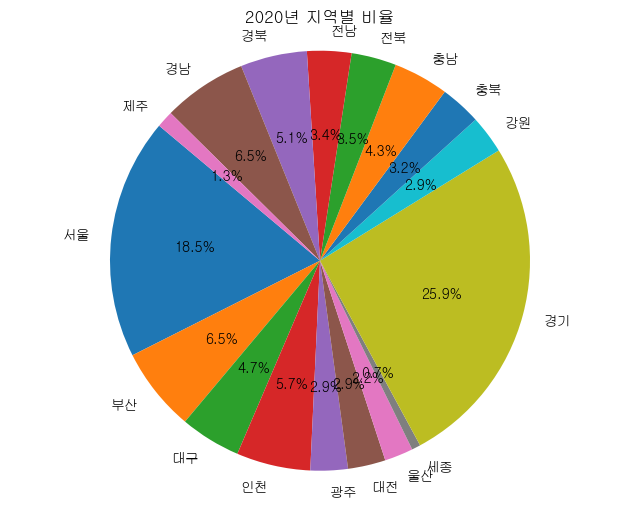

In [202]:
# 2020년 데이터 선택
data_2020 = ingu['2020']

# 파이 그래프 그리기
plt.figure(figsize=(8, 6))
plt.pie(data_2020, labels=data_2020.index, autopct='%1.1f%%', startangle=140)
plt.title('2020년 지역별 비율')
plt.axis('equal')  # 원형 그래프 형태 유지
plt.show()

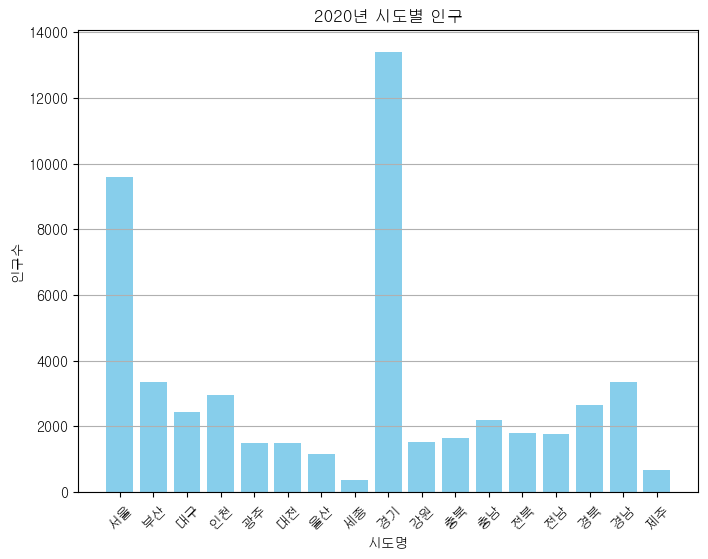

In [314]:
# 2020년 데이터 선택
data_2020 = ingu['2020']

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(data_2020.index, data_2020, color='skyblue')
plt.title('2020년 시도별 인구')
plt.xlabel('시도명')
plt.ylabel('인구수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='y')  # y축 방향으로 그리드 추가
plt.show()

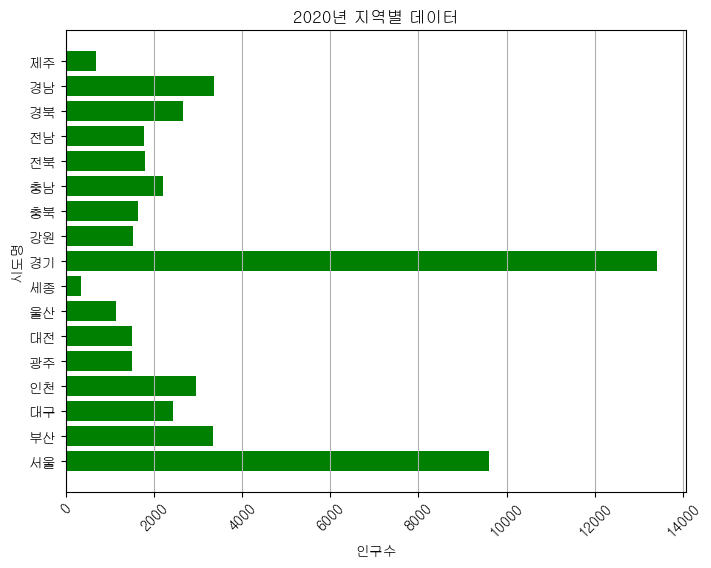

In [322]:
# 2020년 데이터 선택
data_2020 = ingu['2020']

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.barh(data_2020.index, data_2020, color='g')
plt.title('2020년 지역별 데이터')
plt.xlabel('인구수')
plt.ylabel('시도명')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='x')  # x축 방향으로 그리드 추가
plt.show()

In [224]:
ingu1 = ingu.iloc[1:5]
ingu1

,2016,2017,2018,2019,2020
지역,,,,,
부산,3500,3100,3400,3300,3344
대구,2461,2458,2450,2432,2419
인천,2907,2924,2939,2944,2951
광주,1502,1495,1493,1494,1488


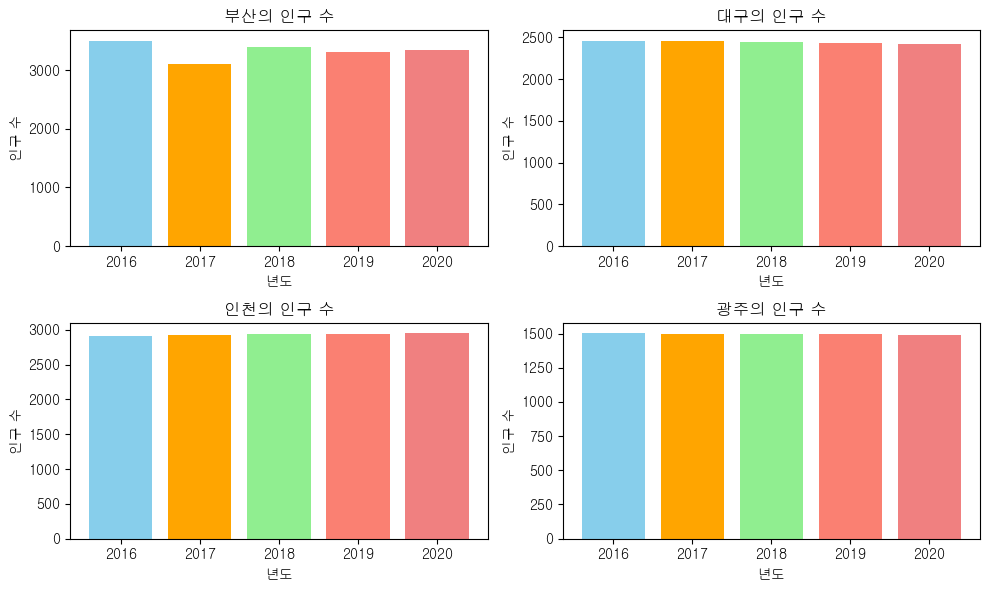

In [238]:
# 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2x2 그리드 설정
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 색상 배열 설정 (연도마다 다른 색상)
colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral']

# 각 지역에 대해 막대 그래프 그리기
for i, region in enumerate(ingu1.index):
    axes[i].bar(ingu1.columns, ingu1.loc[region], color=colors)
    axes[i].set_title(f'{region}의 인구 수')
    axes[i].set_xlabel('년도')
    axes[i].set_ylabel('인구 수')

plt.tight_layout()  # 레이아웃 조정
plt.show()

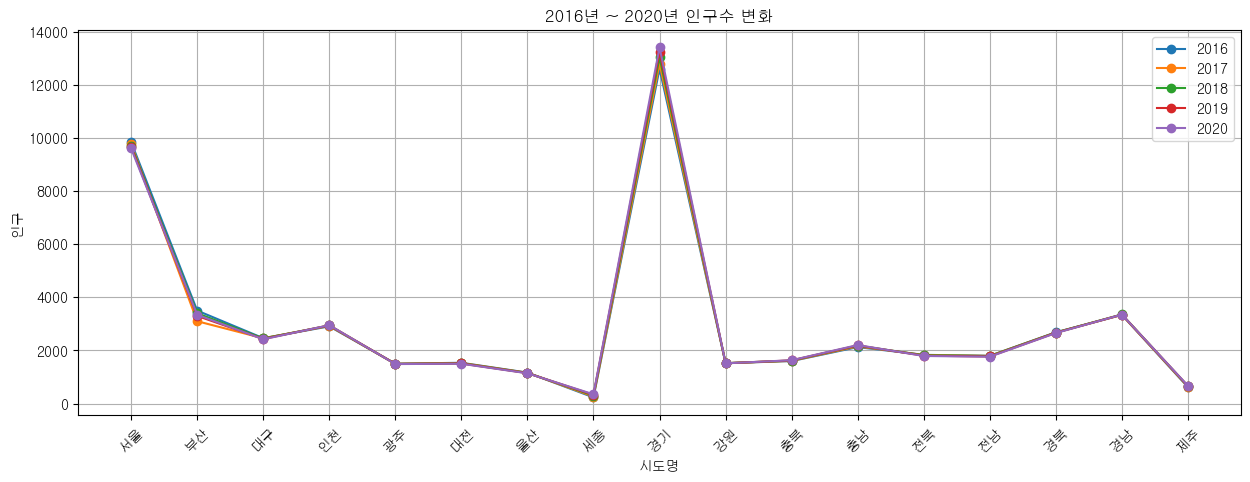

In [249]:
# 전국 인구수 변화 그래프
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for year in ingu.columns:    
    plt.plot(ingu[year], marker='o', label=year)

plt.xlabel('시도명')
plt.ylabel('인구')
plt.title('2016년 ~ 2020년 인구수 변화')
plt.xticks(rotation=45)  # X축 제목 45도 기울어서 표시
plt.legend()
plt.grid()
plt.show()